**Fonte:** Mary Wootters + Nima Anari + Moses Charikar; **Última revisão**: Ana de Almeida




<font size="4"> Iscte Instituto Universitário de Lisboa </font>
  
<font size="4"> Desenho e Análise de Algoritmos </font>
     
<font size="3">Fevereiro de 2022 </font>

   
<font size="5"> <div class="alert alert-block alert-info"> **Experimentação - Aula 1** </div></font> 
 


# Aula 1: Multiplicação

IPython notebook com propostas de implementação para alguns dos algoritmos discutidos na aula para multiplicar números inteiros.

## Objetivo:

Multiplicação de dois inteiros com *n* dígitos. 

## Regras: 

* Podemos usar o operador de multiplicação \* para efetuar produtos entre operandos *só com um dígito* (exemplo: 6 * 7) mas nenhuma outra multiplicação (exemplo, 66 * 77).  
* Podemos usar o operador de adição + para somar qualquer quantidade de dígitos.

In [1]:
# incluir funções necessárias (como a transformação de inteiros nos seus dígitos e vice-versa)
from MultHelpers import *      #em geral, este comando é utilizado para incluir um módulo particular; neste caso, estamos a incluir tudo através da expreessão regular * 
# incluir a biblioteca matplotlib inline no notebook para podermos fazer e ver imediatamente visualizações
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Construção da *baseline*: multiplicação à moda do 1o. ciclo.

In [2]:
# para cada par de dígitos, adicionar com shifts apropriados; 
# vai simular a operação manual feita no 1.º ciclo
def gradeSchoolMult( X, Y ): # X e Y são os inteiros 
    x = getDigits(X)
    y = getDigits(Y)
    summands = []
    for xDigit in range(len(x)):        #para cada posição de dígito em X
        currentXDigit = x[len(x) - xDigit-1]
        z = [0 for i in range(xDigit)]  #z serve para conter os dígitos de 'xDigit times y'; inicializa com zeros
        carry = 0
        for yDigit in range(len(y)):    #para cada posição de dígito em Y
            newProd = getDigits( currentXDigit * y[len(y) - yDigit-1] + carry )
            z.insert( 0, newProd[-1] ) # colocar o próximo dígito das unidades no produto (à direita no z)
            if len(newProd) > 1:       # "e-vai-um"
                carry = newProd[0]
            else:
                carry = 0
        z.insert(0, carry)            # caso haja "e-vai-um", deve ser colocado como digíto mais à esquerda
        summands.append(makeInt(z))
    return sum(summands) # Terminar somando todas as parcelas do produto

### Vamos ver um exemplo para verificar se está a funcionar:

NOTA: quando a testar um novo código, vão querer executar testes mais exaustivos! 

In [3]:
X = 1234567
Y = 87654321
print(gradeSchoolMult(X,Y))
print(X*Y)

108215132114007
108215132114007


Verifiquemos **quanto tempo leva a executar** este pedaço de código!  

Fazemos várias repetições guardando os tempos de execução e depois fazemos um gráfico.  

#### *NOTAS*: Para o gráfico, falaremos um pouco mais em pormenor da biblioteca Matplotlib na aula prática


In [4]:
# Geração de pontos (abcissas) para avaliação de tempos 
nVals = [2**k for k in range(9)]      # valores x = 2^k, depois vemos porquê...
nVals += [k*10 for k in range(10)]    # mais valores decimais
nVals += [k*50 for k in range(2,11)]  # pmais valores espaçados...
nVals.sort()                          # ordenação de todas estas abcissas

# multABunch (função em multABunch.py) executa a função indicada um certo número de vezes (neste caso, 5 vezes)
nValsGS, tValsGS = multABunch(gradeSchoolMult, nVals, numTrials=5)

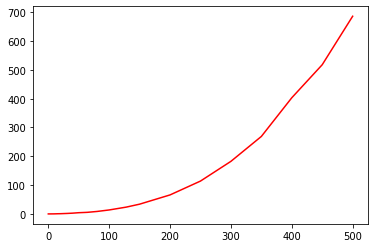

In [5]:
# gráfico  

plt.plot(nValsGS, tValsGS, color="red")



Polinónio ajustado: 0.0035 x^2 + -0.4130 x + 9.6943


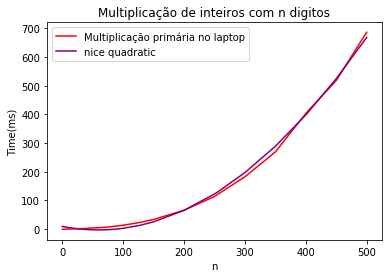

In [6]:
# Para uma visualização melhor e mais completa DEPOIS de vermos o comportamento da multiplicação, 
# vamos verificar se a linha vermelha se ajusta a uma quadrática n^2

plt.plot(nValsGS, tValsGS, color="red", label="Multiplicação primária no laptop")

coeffs = np.polyfit( nValsGS, tValsGS, 2 )   #obter polinómio que melhor se ajusta aos valores do tempo da multiplicação
plt.plot(nValsGS, [ coeffs[2] + coeffs[1]*n + coeffs[0]*n**2 for n in nValsGS], color="purple", label="nice quadratic")

plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplicação de inteiros com n digitos")

print(f'Polinónio ajustado: {coeffs[0]:.4f} x^2 + {coeffs[1]:.4f} x + {coeffs[2]:.4f}')

#### Ajusta-se quase perfeitamente!

Vamos verificar o que acontece para uma escala maior de variação de abcissas:

Polinónio ajustado (a roxo): 0.0035 x^2 + -0.4130 x + 9.6943


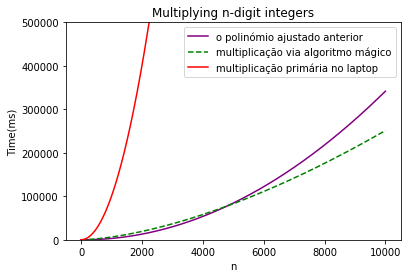

In [7]:

nValsTmp = range(10000)

plt.plot(nValsTmp, [ coeffs[2] + coeffs[1]*n + coeffs[0]*n**2 for n in nValsTmp], color="purple", label="o polinómio ajustado anterior")
plt.plot(nValsTmp, [ n**(1.6)/10 + 100 for n in nValsTmp], "--" , color="green", label="multiplicação via algoritmo mágico")
plt.plot(nValsTmp, [ n**(2)/10 + 100 for n in nValsTmp], color="red", label="multiplicação primária no laptop ")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.ylim(0,500000)
plt.xlim()
plt.legend()
plt.title("Multiplying n-digit integers")
print(f'Polinónio ajustado (a roxo): {coeffs[0]:.4f} x^2 + {coeffs[1]:.4f} x + {coeffs[2]:.4f}')

#### Que conclusões podemos tirar da análise do gráfico?

<a preencher>

## Divide-and-conquer 

Este algoritmo "parte" uma multiplicação de inteiros com n dígitos em 4 multiplicações de tamanho n/2 recursivamente até conseguir calcular o resultado final.

In [8]:
def divideAndConquerMult1( X, Y ):
    return divideAndConquerMult1_helper( getDigits(X), getDigits(Y) )

def divideAndConquerMult1_helper( x, y ):
    
    n = max( len(x), len(y) ) 
    # preenche o inteiro com menor no. de dígitos colocando (enchendo com) zeros à esquerda até atingir o mesmo tamanho
    while len(x) < n:
        x.insert(0,0)
    while len(y) < n:
        y.insert(0,0)
        
    if n == 1:
        return x[0]*y[0] # caso base -> nos requisitos podemos multiplicar diretamente inteiros com um único dígito
    
    # se n > 1:
    mid = round(n/2)
    xhigh = x[:mid]     # ou seja, [ x[0], x[1], ..., x[mid-1] ]
    xlow = x[mid:]      # ou [ x[mid], ..., x[n-1] ]
    yhigh = y[:mid]   
    ylow = y[mid:]
    
    highhigh = divideAndConquerMult1_helper( xhigh , yhigh )
    highlow = divideAndConquerMult1_helper( xhigh , ylow )
    lowhigh = divideAndConquerMult1_helper( xlow , yhigh )
    lowlow = divideAndConquerMult1_helper( xlow , ylow )
    
    # agora fazemos uns shifts para acomodar cada uma das 4 partes e poder somá-las (ver slides para a explicação) 
    HH = getDigits(highhigh) + [ 0 for i in range(2*(n - mid))]
    MID = getDigits(lowhigh + highlow) + [0 for i in range(n-mid)]
    LL = getDigits(lowlow)
    result = makeInt(HH) + makeInt(MID) + makeInt(LL)
    
    return result

Um exemplo para verificar se está a funcionar:


In [9]:
X = 1234567
Y = 87654321
print(divideAndConquerMult1(X,Y))
print(X*Y)

108215132114007
108215132114007


How fast is this? Vamos fazer um pequeno teste:

In [10]:
nValsRec, tValsRec = multABunch(divideAndConquerMult1, nVals, numTrials=5)

Text(0.5, 1.0, 'Multiplicação de inteiros de n-digitos')

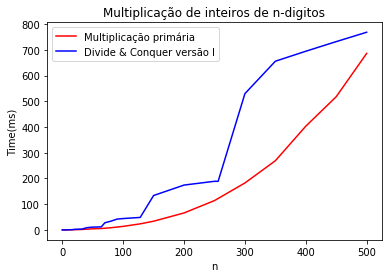

In [11]:
plt.plot(nValsGS, tValsGS, color="red", label="Multiplicação primária")
plt.plot(nValsRec, tValsRec, color="blue", label="Divide & Conquer versão I")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplicação de inteiros de n-digitos")

Hmm...difícil de tirar conclusões gerais (e já vimos que n=500 pode ser pequeno demais para generalizar)!

(E algo de estranho se passa em alguns dos pontos acima, que por acaso (ou talvez não) acontece nos pontos x = portência de 2 ... ).  

Aqui entra a análise matemática, que nos vai permitir compreender como o algoritmo vai funcionar em termos de quantidades de operações para n a aumentar.

## Karatsuba 

Para os algoritmos anteriores, o número de operações tende a crescer de acordo com uma função quadrática n^2.  A multiplicação usando o algoritmo de multiplicação de Karatsuba consegue melhorar esta estimativa de quantidade de operações!  Apesar de utilizar também uma estratégia divide-and-conquer, transforma uma multiplicação de dimensão n em **3** multiplicações de dimensão n/2.

In [12]:
def karatsuba( X, Y ):
    return karatsuba_helper( getDigits(X), getDigits(Y))

def karatsuba_helper( x, y ):  
    n = max( len(x), len(y) )
    # encher o menor com zeros até que ambos tenham a mesma quantidade de dígitos
    while len(x) < n:
        x.insert(0,0)
    while len(y) < n:
        y.insert(0,0)
    if n == 1:
        return x[0]*y[0] # caso base - nos requisitos podemos multiplicar inteiros com um único dígito
    mid = round(n/2)
    xhigh = x[:mid] # [ x[0], x[1], ..., x[mid-1] ]
    xlow = x[mid:] # [ x[mid], ..., x[n-1] ]
    yhigh = y[:mid]
    ylow = y[mid:]
    highhigh = karatsuba_helper( xhigh , yhigh )
    lowlow = karatsuba_helper( xlow , ylow )
    tmpTerm = karatsuba_helper( getDigits( makeInt(xlow) + makeInt(xhigh) ) , getDigits( makeInt(ylow) + makeInt(yhigh) ) )
    middleTerm = tmpTerm - highhigh - lowlow # igual a highlow + lowhigh na função anterior divideAndConquerMult1
    HH = getDigits(highhigh) + [ 0 for i in range(2*(n - mid))]
    MID = getDigits(middleTerm) + [0 for i in range(n-mid)]
    LL = getDigits(lowlow)
    result = makeInt(HH) + makeInt(MID) + makeInt(LL)
    return result

Vamos ver um exemplo para verificar se está a funcionar:

In [13]:
X = 1234567
Y = 654321
print(karatsuba(X,Y))
print(X*Y)

807803114007
807803114007


In [14]:
nValsKarat, tValsKarat = multABunch(karatsuba, nVals, numTrials=5)

Text(0.5, 1.0, 'Multiplicação de inteiros de n-digitos')

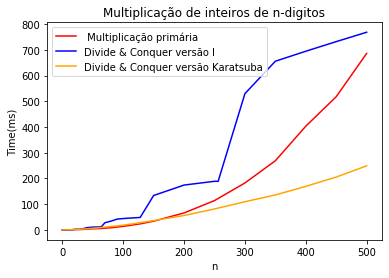

In [15]:
plt.plot(nValsGS, tValsGS, color="red", label=" Multiplicação primária")
plt.plot(nValsRec, tValsRec, color="blue", label="Divide & Conquer versão I")
plt.plot(nValsKarat, tValsKarat, color="orange", label="Divide & Conquer versão Karatsuba")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplicação de inteiros de n-digitos")

Cool! Parece funcionar muito melhor (mais eficientemente)!